# [SideThon] Quick, Draw!
- AIFFEL AI Core 과정에서 온라인 7기 동기들과의 사이드 프로젝트입니다.
- AI 모델링 경험 및 커뮤니케이션 역량 강화를 목적으로 진행합니다.

### 목차
1. 데이터 준비하기
2. 데이터 전처리
3. 파이프라인 준비하기
4. 모델링

---

## 1. 데이터 준비하기
### kaggle API로 데이터 다운로드 받기

In [1]:
# 캐글 API 접속을 위한 케글 설치

!pip install kaggle

In [2]:
# API Token 만들기

!mkdir QuickDraw.kaggel

mkdir: QuickDraw.kaggel: File exists


In [3]:
!pip show kaggle

Name: kaggle
Version: 1.6.4
Summary: Kaggle API
Home-page: https://github.com/Kaggle/kaggle-api
Author: Kaggle
Author-email: support@kaggle.com
License: Apache 2.0
Location: /opt/homebrew/anaconda3/lib/python3.11/site-packages
Requires: bleach, certifi, python-dateutil, python-slugify, requests, six, tqdm, urllib3
Required-by: opendatasets


In [4]:
# kaggle API 코드(kaggle.json)파일 경로 인식시켜 주기 위한 코드
# kaggle.json 파일을 찾도록 Kaggle 명령줄 도구를 구성하여 Kaggle API로 인증

import os
cur_dir = os.getcwd()
os.environ['KAGGLE_CONFIG_DIR'] = cur_dir

In [5]:
# import os: 환경 변수 액세스 및 파일 경로 조작을 포함하여 운영 체제와 상호 작용하는 방법을 제공하는 Python os 모듈을 가져옵니다.
# cur_dir = os.getcwd(): 이 줄은 현재 작업 디렉터리(Python 스크립트가 실행되는 디렉터리)를 검색하여 이를 cur_dir 변수에 할당합니다.
# os.environ['KAGGLE_CONFIG_DIR'] = cur_dir: 환경 변수 KAGGLE_CONFIG_DIR을 cur_dir 값으로 설정합니다. 
# KAGGLE_CONFIG_DIR 환경 변수는 Kaggle 명령줄 도구에서 API 자격 증명이 포함된 kaggle.json 파일이 위치해야 하는 디렉터리를 결정하는 데 사용됩니다.

In [6]:
# data라는 폴더에 컴피티션에서 제공하는 데이터를 다운 받는 코드
!kaggle competitions download -c quickdraw-doodle-recognition -p ./data

quickdraw-doodle-recognition.zip: Skipping, found more recently modified local copy (use --force to force download)


In [12]:
# data 폴더에 있는 train 데이터를 unzip하는 코드
# -o 는 덮어쓰기 가능을 의미
# -q 는 quite로 실행중 자잘한 오류를 생략해주는 기능
!unzip -q -o ./data/quickdraw-doodle-recognition.zip -d ./data/

In [14]:
# 서버 용량 알아보기
!df -h

Filesystem        Size    Used   Avail Capacity iused ifree %iused  Mounted on
/dev/disk3s1s1   926Gi   9.4Gi   420Gi     3%    394k  4.3G    0%   /
devfs            199Ki   199Ki     0Bi   100%     692     0  100%   /dev
/dev/disk3s6     926Gi    24Gi   420Gi     6%      24  4.4G    0%   /System/Volumes/VM
/dev/disk3s2     926Gi   5.6Gi   420Gi     2%    1.1k  4.4G    0%   /System/Volumes/Preboot
/dev/disk3s4     926Gi    32Mi   420Gi     1%      45  4.4G    0%   /System/Volumes/Update
/dev/disk1s2     500Mi   6.0Mi   479Mi     2%       1  4.9M    0%   /System/Volumes/xarts
/dev/disk1s1     500Mi   6.1Mi   479Mi     2%      25  4.9M    0%   /System/Volumes/iSCPreboot
/dev/disk1s3     500Mi   3.8Mi   479Mi     1%      67  4.9M    0%   /System/Volumes/Hardware
/dev/disk3s5     926Gi   466Gi   420Gi    53%    1.5M  4.4G    0%   /System/Volumes/Data
map auto_home      0Bi     0Bi     0Bi   100%       0     0     -   /System/Volumes/Data/home


## 활용할 데이터셋 살펴보기
데이터셋은 아래와 같이 구분되어 있습니다.  
- raw data : 실제 유저가 그린 데이터
- simplified : 불필요한 포인트들이 제거된 데이터  

용량의 이슈로 simplified dataset을 사용하겠습니다.  

### train data

In [13]:
# csv 파일로 되어있는 데이터 불러오기

import pandas as pd

# train 데이터의 csv 파일이 있는 폴더 경로 설정
folder_path = '/Users/yangh/Downloads/yh_project/data/train_simplified'
# 각 csv 파일을 불러오기 위해 초기화
dataframes = []

# 폴더에 있는 csv파일 반복문으로 불러오기
for file in os.listdir(folder_path):
    if file.endswith('.csv'):
        # csv파일 읽고 list에 추가하기
        file_path = os.path.join(folder_path, file)
        df = pd.read_csv(file_path)
        dataframes.append(df)

# 불러온 데이터 하나로 합치기 : 'dataframes' 목록에 저장된 DataFrame을 하나의 DataFrame으로 연결(결합)하고 원본 DataFrame의 인덱스는 무시
train_df = pd.concat(dataframes, ignore_index=True)

print(train_df.head())

  countrycode                                            drawing  \
0          US               [[[0, 126, 190, 255], [7, 1, 4, 0]]]   
1          US     [[[0, 15, 115, 180, 251], [0, 6, 13, 27, 33]]]   
2          AU  [[[32, 91, 255], [32, 48, 70]], [[179, 146, 47...   
3          FI  [[[0, 9, 56, 92, 186, 255], [0, 10, 28, 36, 66...   
4          UA     [[[0, 101, 155, 240, 255], [27, 11, 6, 4, 0]]]   

             key_id  recognized                   timestamp  word  
0  4819728134569984        True  2017-03-26 23:57:14.639540  line  
1  6630630412517376        True  2017-03-08 19:27:39.942440  line  
2  5532301360365568        True  2017-03-17 03:12:15.066140  line  
3  5703119189049344        True  2017-03-17 14:13:12.645900  line  
4  5859843703308288        True  2017-03-12 17:11:23.741940  line  


train dataset은 총 5개의 컬럼으로 구성되어 있습니다. 
- 전체 컬럼 : countrycode, drawing key_id, recognized, timestamp, word
- countrycode : 그림이 그려진 곳의 국가 정보이므로, 이미지가 무엇인지 예측하는 것과는 연관성이 비교적 낮아 보입니다.
- drawing : 실제 그림에 대한 내용이자 예측을 위한 정보로 보입니다.
- recognized : 게임에서 그림을 정답 라벨과 맞게 인식했는지를 True/False로 표시한 bool 타입의 항목입니다.
- timestamp : 그린 시간
- word : 정답 라벨

In [46]:
import matplotlib.pyplot as plt

# "drawing" column의 첫번째 데이터 추출하기
first_drawing_data = df.loc[0, 'drawing']

# 시각화 하기
plt.figure(figsize=(6, 4))
for coordinates in first_drawing_data:
    plt.plot(coordinates[0], coordinates[1], marker='o')  # x, y 좌표
plt.title('First Drawing')
plt.xlabel('X')
plt.ylabel('Y')
plt.grid(True)
plt.show()

IndexError: string index out of range

<Figure size 600x400 with 0 Axes>

"IndexError: 문자열 인덱스가 범위를 벗어났습니다." 오류는 범위를 벗어난 문자열 인덱스에 액세스하려고 함을 나타냅니다.  
이는 좌표가 좌표 목록이 아닌 문자열로 해석되고 있음을 의미합니다.  
'좌표'가 좌표 목록으로 처리되도록 플롯하기 전에 문자열을 구문 분석하고 적절한 목록 형식으로 변환합니다.

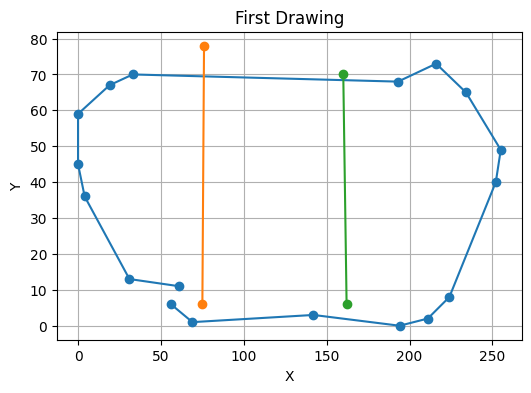

In [47]:
import ast
import matplotlib.pyplot as plt

# "drawing" column의 첫번째 데이터 추출하고 string 형태에서 list 형태로 변환하기
first_drawing_data = ast.literal_eval(df.loc[0, 'drawing'])

# 시각화 하기
plt.figure(figsize=(6, 4))
for coordinates in first_drawing_data:
    plt.plot(coordinates[0], coordinates[1], marker='o')   # x, y 좌표
plt.title('First Drawing')
plt.xlabel('X')
plt.ylabel('Y')
plt.grid(True)
plt.show()

drawing 컬럼의 숫자들을 좌표 정보를 나타냄을 알 수 있습니다.

### test data
test dataset은 아래와 같이 key_id, countrycode, drawing 총 3개의 컬럼으로 구성되어 있습니다.

In [15]:
test_df = pd.read_csv("/Users/yangh/Downloads/yh_project/data/test_simplified.csv")

test_df.head()

,key_id,countrycode,drawing
0,9000003627287624,DE,"[[[17, 18, 20, 25, 137, 174, 242, 249, 251, 25..."
1,9000010688666847,UA,"[[[174, 145, 106, 38, 11, 4, 4, 15, 29, 78, 16..."
2,9000023642890129,BG,"[[[0, 12, 14, 17, 16, 24, 55, 57, 60, 79, 82, ..."
3,9000038588854897,US,"[[[0, 9, 23, 40, 54, 60, 81, 105, 123, 167, 20..."
4,9000052667981386,AR,"[[[87, 82, 71, 63, 66, 92, 96, 95], [220, 218,..."


### 제출 형식 확인
sample_submission.csv 파일로 제출 형식을 확인합니다.  
key_id, word라는 2개의 컬럼으로 구성되어 있으며, 캐글 소개 페이지의 내용처럼 예측한 단어는 공백으로 구분되어 있습니다.

In [18]:
# 제출 형식 확인

submission_df = pd.read_csv("/Users/yangh/Downloads/yh_project/data/sample_submission.csv")
submission_df.head()

,key_id,word
0,9000003627287624,The_Eiffel_Tower airplane donut
1,9000010688666847,The_Eiffel_Tower airplane donut
2,9000023642890129,The_Eiffel_Tower airplane donut
3,9000038588854897,The_Eiffel_Tower airplane donut
4,9000052667981386,The_Eiffel_Tower airplane donut


## 2. 데이터 전처리

- 예측할 정답 라벨 확인 : 총 라벨 개수
- 데이터 분포, 균형 확인 : 어떤 라벨의 데이터가 많은지? 확인하기
- True, False 비율 확인

In [24]:
# 데이터 정보 확인
print(train_df.info())
print(test_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49707579 entries, 0 to 49707578
Data columns (total 6 columns):
 #   Column       Dtype 
---  ------       ----- 
 0   countrycode  object
 1   drawing      object
 2   key_id       int64 
 3   recognized   bool  
 4   timestamp    object
 5   word         object
dtypes: bool(1), int64(1), object(4)
memory usage: 1.9+ GB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112199 entries, 0 to 112198
Data columns (total 3 columns):
 #   Column       Non-Null Count   Dtype 
---  ------       --------------   ----- 
 0   key_id       112199 non-null  int64 
 1   countrycode  112198 non-null  object
 2   drawing      112199 non-null  object
dtypes: int64(1), object(2)
memory usage: 2.6+ MB
None


- train data의 행의 개수 : 총 49,707,579개 
- test data의 행의 개수 : 총 112,199개로 이는 예측해야 하는 정답 라벨의 개수입니다.

In [30]:
# train : test data 비율
len(test_df) / (len(train_df)+len(test_df))

0.002252097550494906

- train data 대비 test data는 0.2% 수준으로 학습 데이터의 양은 충분해보입니다.

- Null 값은 아래와 같이 countrycode에서만 발견됩니다.

<Axes: >

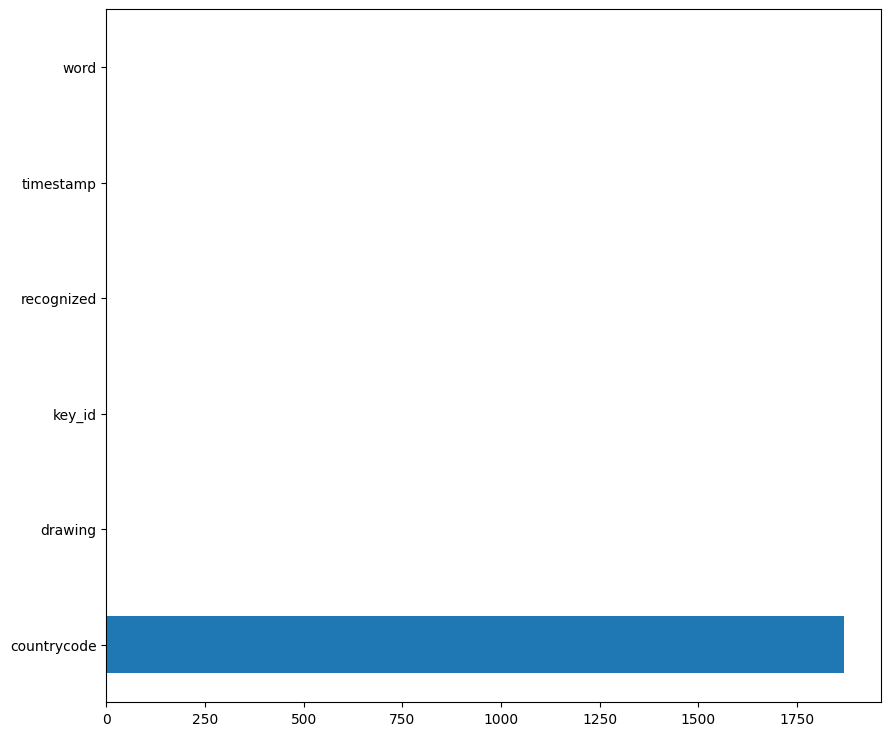

In [31]:
# Null 값 분포 시각화 : 각 열마다 Null의 개수를 모두 합쳐서 그래프 그리기

train_df.isnull().sum().plot.barh(figsize=(10,9))

### countrycode 열 삭제하기
- 학습 데이터의 양이 충분하며, countrycode 데이터는 그림을 표현하는 단어 예측에 중요하지 않은 단어이므로 컬럼 자체를 삭제하겠습니다.

In [35]:
# 데이터프레임 복사본 만들기
new_train_df = train_df.copy()

In [36]:
# 복사본에서 countrycode 열 삭제하기
new_train_df = new_train_df.drop(columns='countrycode', axis=1, inplace=False)
new_train_df.head()

,drawing,key_id,recognized,timestamp,word
0,"[[[0, 126, 190, 255], [7, 1, 4, 0]]]",4819728134569984,True,2017-03-26 23:57:14.639540,line
1,"[[[0, 15, 115, 180, 251], [0, 6, 13, 27, 33]]]",6630630412517376,True,2017-03-08 19:27:39.942440,line
2,"[[[32, 91, 255], [32, 48, 70]], [[179, 146, 47...",5532301360365568,True,2017-03-17 03:12:15.066140,line
3,"[[[0, 9, 56, 92, 186, 255], [0, 10, 28, 36, 66...",5703119189049344,True,2017-03-17 14:13:12.645900,line
4,"[[[0, 101, 155, 240, 255], [27, 11, 6, 4, 0]]]",5859843703308288,True,2017-03-12 17:11:23.741940,line


In [37]:
# 복사본 데이터셋의 라벨과 라벨 개수 확인하기 : 단어의 고유값 확인 (중복 없는)
print('라벨 총 개수: ', len(new_train_df['word'].unique()))
print(new_train_df['word'].unique())

라벨 총 개수:  340
['line' 'bucket' 'bus' 'cello' 'ocean' 'truck' 'camouflage' 'harp'
 'telephone' 'stairs' 'star' 'guitar' 'sandwich' 'sun' 'feather' 'leaf'
 'toilet' 'strawberry' 'waterslide' 'bottlecap' 'coffee cup' 'banana'
 'dresser' 'house plant' 'skateboard' 'skyscraper' 'pizza' 'hammer'
 'teapot' 'giraffe' 'underwear' 'snowman' 'monkey' 'computer' 'pencil'
 'shovel' 'necklace' 'compass' 'bat' 'bicycle' 'teddy-bear' 'scorpion'
 'hot dog' 'fish' 'see saw' 'rain' 'snail' 'sink' 'belt' 'speedboat'
 'pants' 'trombone' 'crocodile' 'broccoli' 'hedgehog' 'rainbow' 'fork'
 'bulldozer' 'sock' 'snake' 'paper clip' 'bear' 'marker' 'birthday cake'
 'saxophone' 'rake' 'stethoscope' 'broom' 'crown' 'square' 'fire hydrant'
 'jail' 'donut' 'oven' 'beard' 'yoga' 'The Eiffel Tower' 'camera' 'purse'
 'ice cream' 'pig' 'trumpet' 'table' 'bush' 'rollerskates' 'goatee' 'cup'
 'anvil' 'suitcase' 'chair' 'drill' 'peanut' 'squirrel' 'matches' 'sword'
 'cat' 'toe' 'snorkel' 'pond' 'calculator' 'airplane' 'squ

- countrycode 컬럼을 삭제한 데이터프레임과 아래 원본 데이터프레임의 총 라벨 개수는 동일합니다.   
- 따라서 countrycode 컬럼을 삭제한 데이터프레임으로 계속해서 작업을 진행합니다.

In [22]:
# 라벨과 라벨 개수 확인하기 : 단어의 고유값 확인 (중복 없는)
print('라벨 총 개수: ', len(train_df['word'].unique()))
print(train_df['word'].unique())

라벨 총 개수:  340
['line' 'bucket' 'bus' 'cello' 'ocean' 'truck' 'camouflage' 'harp'
 'telephone' 'stairs' 'star' 'guitar' 'sandwich' 'sun' 'feather' 'leaf'
 'toilet' 'strawberry' 'waterslide' 'bottlecap' 'coffee cup' 'banana'
 'dresser' 'house plant' 'skateboard' 'skyscraper' 'pizza' 'hammer'
 'teapot' 'giraffe' 'underwear' 'snowman' 'monkey' 'computer' 'pencil'
 'shovel' 'necklace' 'compass' 'bat' 'bicycle' 'teddy-bear' 'scorpion'
 'hot dog' 'fish' 'see saw' 'rain' 'snail' 'sink' 'belt' 'speedboat'
 'pants' 'trombone' 'crocodile' 'broccoli' 'hedgehog' 'rainbow' 'fork'
 'bulldozer' 'sock' 'snake' 'paper clip' 'bear' 'marker' 'birthday cake'
 'saxophone' 'rake' 'stethoscope' 'broom' 'crown' 'square' 'fire hydrant'
 'jail' 'donut' 'oven' 'beard' 'yoga' 'The Eiffel Tower' 'camera' 'purse'
 'ice cream' 'pig' 'trumpet' 'table' 'bush' 'rollerskates' 'goatee' 'cup'
 'anvil' 'suitcase' 'chair' 'drill' 'peanut' 'squirrel' 'matches' 'sword'
 'cat' 'toe' 'snorkel' 'pond' 'calculator' 'airplane' 'squ

In [42]:
# 라벨 별 개수 살펴보기
new_train_df['word'].value_counts()

word
snowman        340029
potato         329204
calendar       321981
marker         319136
banana         307936
                ...  
whale          116502
screwdriver    116313
ceiling fan    115413
bed            113862
panda          113613
Name: count, Length: 340, dtype: int64

- 대략적인 라벨 별 분포는 아래와 같습니다.

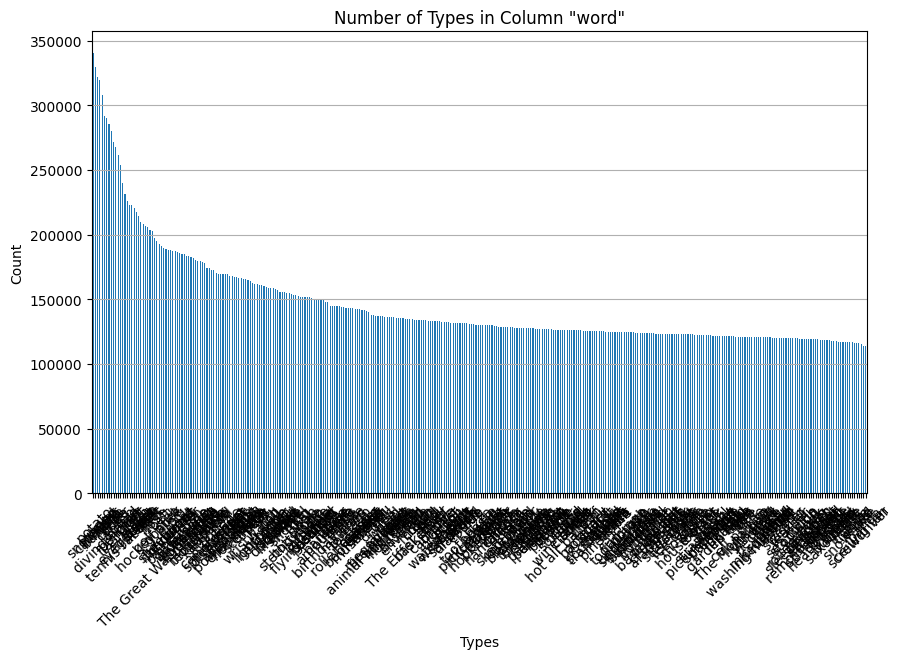

In [43]:
import matplotlib.pyplot as plt

column_name = 'word'

# 열의 고유한 값과 개수를 가져오기
unique_values = new_train_df[column_name].value_counts()

# 시각화 하기
plt.figure(figsize=(10, 6))
unique_values.plot(kind='bar')
plt.title('Number of Types in Column "{}"'.format(column_name))
plt.xlabel('Types')
plt.ylabel('Count')
plt.xticks(rotation=45)  # 가독성을 높이기 위해 X축 레이블을 회전
plt.grid(axis='y')  # y축을 따라 그리드 선을 추가
plt.show()

- 가장 적은 라벨 대비 3배 가까이 되는 라벨도 일부 있으나, 전반적으로 라벨 별 개수의 분포가 고른 편입니다.

In [39]:
# True, False 개수 살펴보기
new_train_df['recognized'].value_counts()

recognized
True     45512752
False     4194827
Name: count, dtype: int64

### 3-1. 전처리 함수 정의
- 이 함수는 주어진 CSV 파일을 전처리하고, 지정된 라벨을 추가한 후, 데이터를 여러 개의 압축 파일로 분할 저장하는 작업을 수행합니다.
- pandas.DataFrame에 라벨 열을 추가한 후, 데이터를 divide_shuffles 수만큼 분할하여 각각의 압축 파일(gzip)로 저장합니다.
- 이 과정에서 os와 gzip 라이브러리가 파일 시스템 작업과 압축 파일 처리에 사용됩니다.
- 마지막으로, 원본 CSV 파일은 삭제되고, 처리된 파일의 이름은 로그 파일에 기록됩니다.

In [48]:
from tqdm import tqdm  # tqdm 라이브러리를 임포트하여 진행 상황을 시각화
import pandas as pd  # pandas 라이브러리를 데이터 처리를 위해 임포트
import os  # os 라이브러리를 운영 체제와 상호 작용을 위해 임포트
import gzip  # gzip 라이브러리를 압축 파일 처리를 위해 임포트

def preprocess_file(csv_file, raw_path, raw_shuffle_data_path, divide_shuffles, label, processed_files_log):
    try:
        # CSV 파일을 읽어서 데이터프레임으로 저장합니다.
        df = pd.read_csv(raw_path + csv_file, usecols=["drawing", "key_id"])

        # 라벨 열을 추가하고 지정된 "label" 값을 넣습니다.
        df["y"] = label

        # "key_id" 값을 사용하여 "cv" 열을 생성합니다.
        df["cv"] = (df.key_id // 10000) % divide_shuffles

        for k in range(divide_shuffles):
            # 새로운 파일 이름을 생성하여 압축 파일로 저장합니다.
            filename = raw_shuffle_data_path + f"train_k{k}.csv.gz"
            
            # "cv" 열 값이 "k"와 일치하는 행만 선택하여 "chunk"에 저장합니다.
            chunk = df[df.cv == k]
            
            # "key_id"와 "cv" 열을 삭제합니다.
            chunk = chunk.drop(["key_id", "cv"], axis=1)

            if not os.path.exists(filename):
                # 파일이 존재하지 않으면 새로 생성합니다.
                chunk.to_csv(filename, index=False, compression="gzip")
            else:
                with gzip.open(filename, "at") as f:
                    # 파일이 이미 있으면 gzip 모드에서 데이터를 추가로 저장합니다.
                    chunk.to_csv(f, header=False, index=False)

        os.remove(raw_path + csv_file)  # 원본 CSV 파일을 삭제합니다.

    except Exception as e:
        print(f"오류 발생: {csv_file} 처리 중 - {e}")  # 오류 발생 시 메시지 출력
        
    with open(processed_files_log, "a") as log:
        log.write(csv_file + "\n")  # 처리된 파일 로그에 기록합니다.

### 3-2. 압축 해제 및 전처리
- 이 함수는 사용자로부터 데이터 전처리를 위한 경로 선택을 입력받아, 해당 경로에 있는 데이터를 전처리하는 과정을 수행합니다.
- 사용자는 train_raw 또는 train_simplified 중 하나를 선택할 수 있습니다.
- 선택된 경로에 따라 데이터 파일들을 읽고, 이를 셔플링 및 압축하여 저장하는 작업을 포함합니다.
- 이 과정에서 os, tqdm, gzip, pandas 등의 라이브러리가 사용됩니다.
- 주요 단계로는 사용자 입력 받기, 경로 설정, 디렉토리 생성, 파일 전처리 및 로깅, 그리고 최종적으로 각 파일을 셔플링 및 압축하여 저장하는 작업이 포함됩니다.
- 또한 ~_processed_files.log 파일에는 각각의 csv파일을 처리한 내용이 기록되며 이는 서버 연결이 끊기는 등의 이슈로 작업이 중단되어도 멈춘 부분부터 작업할 수 있도록 하기 위함 입니다.

In [ ]:
def main():
    # 사용자 입력을 받아 전처리할 경로를 선택합니다.
    while True:
        print("전처리할 데이터 경로를 선택하세요:")
        print("1: train_raw")
        print("2: train_simplified")
        choice = input("선택 (1 또는 2): ")
        
        # 선택에 따라 경로를 설정합니다.
        if choice == '1':
            raw_path = "./data/train_raw/"
            processed_files_log = "./raw_processed_files.log"  # 1번을 선택한 경우 파일명 설정
            break
        elif choice == '2':
            raw_path = "./data/train_simplified/"
            processed_files_log = "./simplified_processed_files.log"  # 2번을 선택한 경우 파일명 설정
            break
        else:
            print("잘못된 선택입니다. 다시 입력해주세요.")

    # 설정된 경로 출력
    print(f"선택된 경로: {raw_path}")

    # 나머지 코드는 선택된 raw_path를 사용합니다.
    raw_shuffle_data_path = raw_path + 'shuffle_raw_gzs/'
    divide_shuffles = 100

    if not os.path.exists(raw_shuffle_data_path):
        os.makedirs(raw_shuffle_data_path)

    train_csvs = os.listdir(raw_path)
    for y, csv_file in tqdm(enumerate(train_csvs)):
        preprocess_file(csv_file, raw_path, raw_shuffle_data_path, divide_shuffles, y, processed_files_log)

    # 각 청크 파일에 대한 셔플링 및 압축 처리
    for k in tqdm(range(divide_shuffles)):  # divide_shuffles번만큼 반복하는 루프를 초기화. divide_shuffles는 루프가 실행되는 횟수를 나타내는 변수.
        filename = raw_shuffle_data_path + f'train_k{k}.csv.gz'  # filename은 raw_shuffle_data_path 디렉토리에서 확장자가 .gz인 CSV 파일을 찾기 위해 사용됨.
        with gzip.open(filename, 'rt') as f:  # gzip.open() 함수를 사용하여 지정된 filename의 압축된 CSV 파일을 읽기 모드('rt')로 열기. 파일은 텍스트 파일로 열림.
            df = pd.read_csv(f)

        # CSV 파일을 읽은 후, DataFrame df가 sample() 메서드를 사용하여 셔플됨. 
        # frac=1을 사용하면 전체 DataFrame을 셔플함. reset_index(drop=True) 메서드는 셔플 이후 DataFrame의 인덱스를 재설정하여 이전 인덱스를 삭제함.
        df = df.sample(frac=1).reset_index(drop=True)
        # 다른 with 블록을 사용하여 동일한 파일 이름을 쓰기 모드('wt')로 열어서 셔플된 DataFrame을 압축된 CSV 파일에 다시 쓰기
        with gzip.open(filename, 'wt') as f:  # df의 to_csv() 메서드를 사용하여 셔플된 DataFrame을 열린 파일 객체 f에 쓰기
            df.to_csv(f, index=False)  # index=False 인자는 DataFrame 인덱스가 CSV 파일에 쓰여지지 않도록 함

# if __name__ == "__main__": main()는 스크립트가 메인 프로그램으로 실행될 때만 main() 함수가 실행되도록 하고, 다른 스크립트에 모듈로 가져와지면 실행되지 않도록 함
if __name__ == "__main__":
    main()

전처리할 데이터 경로를 선택하세요:
1: train_raw
2: train_simplified


선택 (1 또는 2):  2


선택된 경로: ./data/train_simplified/


3it [02:11, 38.90s/it]

### 3-3. Zip파일 만들기
이 코드는 원본 데이터를 압축 파일로 변환하는 과정을 담당합니다.
- 먼저, 원본 데이터가 위치한 디렉토리(raw_path)와 무작위로 섞인 데이터를 저장할 디렉토리(raw_shuffle_data_path)의 경로를 설정합니다.
- 그 후, raw_shuffle_data_path 디렉토리 내의 모든 .gz 파일을 찾아 리스트(gz_files)에 저장합니다.
- 이 파일들은 zipfile.ZipFile을 사용하여 zip_filename에 지정된 경로의 압축 파일로 저장됩니다.
- 각 파일이 압축 파일에 추가될 때마다 tqdm 라이브러리를 사용하여 진행 상황을 시각적으로 표시합니다.

In [ ]:
# 원본 데이터 디렉토리의 경로
raw_path = "./data/train_simplified/"

# 무작위로 섞인 원본 데이터를 저장할 디렉토리의 경로
raw_shuffle_data_path = raw_path + "shuffle_raw_gzs/"

# 압축 파일 경로를 지정
zip_filename = './train_simplified_chunked.zip'

# 폴더 내의 .gz 파일 목록을 가져옴
gz_files = [file for file in os.listdir(raw_shuffle_data_path) if file.endswith('.gz')]

# tqdm 진행 바를 설정
with tqdm(total=len(gz_files), unit="file") as pbar:
    pbar.set_description("압축 중")

    # zipfile 객체를 생성하여 파일을 하나씩 압축에 추가
    with zipfile.ZipFile(zip_filename, 'w') as zipf:
        for file in gz_files:
            # 각 파일을 zip 파일에 추가
            zipf.write(os.path.join(raw_shuffle_data_path, file), arcname=file)
            # 진행 바 업데이트
            pbar.update(1)

### Reference
- [유튜브: 큰 사이즈의 데이터를 효과적으로 처리, 분석하기](https://www.youtube.com/watch?v=M6YuOk4dAH4)
- [유튜브 자료](https://drive.google.com/file/d/12faqaslFIF-Sg_sU3jeGyauW5ClRqS8D/view)